In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

%run Preprocessing.ipynb


Train set: (31275, 14) (31275,)
Validation set: (6255, 14) (6255,)
Test set: (4170, 14) (4170,)


In [ ]:
#Random forest regression analysis

In [3]:
# Define the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define parameter distributions (wider ranges than grid)
param_dist = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": [None, "sqrt", "log2", 0.5]  # valid options
}

# Randomized search (using MSE for tuning)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist, 
    n_iter=20,
    cv=3,
    scoring="neg_mean_squared_error",  # MSE (will come back negative)
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search on training data
random_search.fit(X_train, y_train)

# Extract best parameters and scores
best_params = random_search.best_params_
best_mse = -random_search.best_score_   # negate because sklearn returns negative MSE
best_rmse = np.sqrt(best_mse)

print("Best parameters found:", best_params)
print("Best MSE:", best_mse)
print("Best RMSE:", best_rmse)

# Evaluate on validation set with MAE (intuitive in euros)
best_rf = random_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
print("Validation MAE:", mae)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30}
Best MSE: 17916.476932487712
Best RMSE: 133.85244462649052
Validation MAE: 62.92621565996706


In [5]:
#Training data evaluation
y_train_pred = best_rf.predict(X_train)
MAE_train = mean_absolute_error(y_train, y_train_pred)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_train = mean_squared_error(y_train, y_train_pred)

print("Train MAE", MAE_train)
print("Train RMSE", RMSE_train)
print("Train MSE", MSE_train)


#Validation data evaluation

MAE_val = mean_absolute_error(y_val, y_val_pred)
RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Val MAE", MAE_val)
print("Val RMSE", RMSE_val)

Train MAE 29.617715506875154
Train RMSE 60.49764618996255
Train MSE 3659.96519452589
Val MAE 62.92621565996706
Val RMSE 118.46411906689048
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.1s
[CV] END max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  12.2s
[CV] END max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  12.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10

In [44]:
print(y.describe())


count    41700.000000
mean       256.902581
std        204.623597
min         34.779339
25%        144.016085
50%        203.638895
75%        297.150071
max       4467.149208
Name: Price, dtype: float64


In [45]:
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
best_rf.fit(X_train_val, y_train_val)

y_test_pred = best_rf.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Normalized RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred))/(y_test.mean()))


Test MAE: 60.518825468376846
Test RMSE: 112.79590956057785
Normalized RMSE 0.4288446897025919


In [46]:
print(y_test_pred)

[234.79395632 159.24885786 319.10559029 ... 217.07151883 469.35751496
 451.76366004]


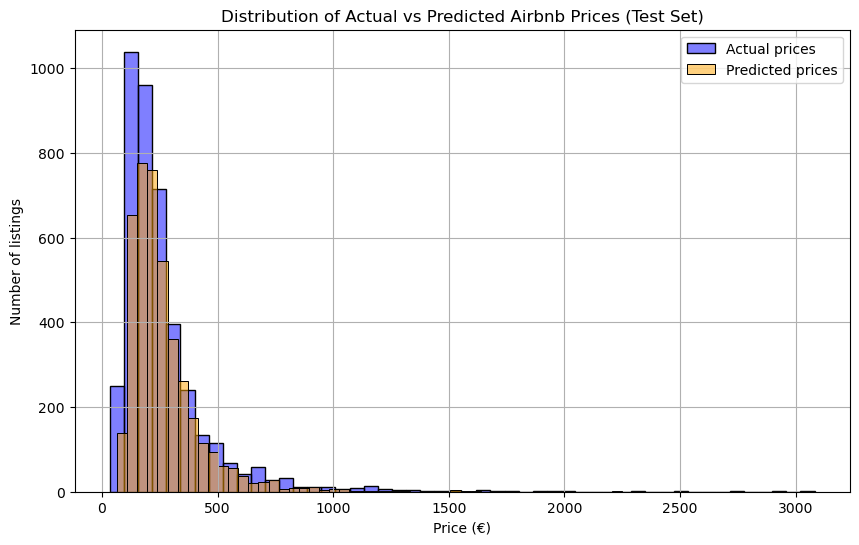

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of actual vs predicted prices
plt.figure(figsize=(10,6))

sns.histplot(y_test, bins=50, color="blue", alpha=0.5, label="Actual prices")
sns.histplot(y_test_pred, bins=50, color="orange", alpha=0.5, label="Predicted prices")

plt.title("Distribution of Actual vs Predicted Airbnb Prices (Test Set)")
plt.xlabel("Price (€)")
plt.ylabel("Number of listings")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
print("Number of actual test listings:", len(y_test))
print("Number of predicted test listings:", len(y_test_pred))


Number of actual test listings: 4170
Number of predicted test listings: 4170


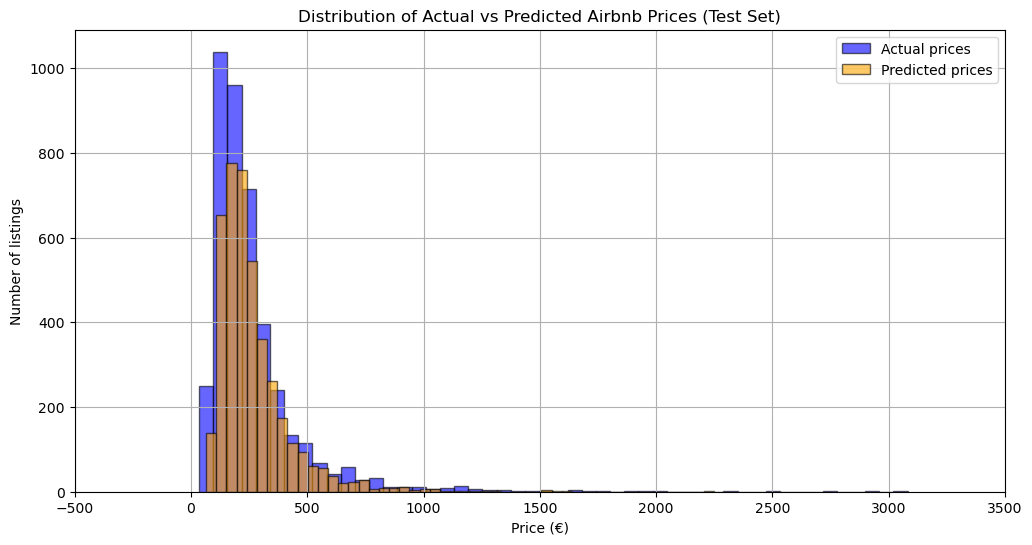

In [49]:
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=50, alpha=0.6, label="Actual prices", color="blue", edgecolor="black")
plt.hist(y_test_pred, bins=50, alpha=0.6, label="Predicted prices", color="orange", edgecolor="black")
plt.title("Distribution of Actual vs Predicted Airbnb Prices (Test Set)")
plt.xlabel("Price (€)")
plt.ylabel("Number of listings")
plt.xlim(-500, 3500)  # extend x-axis into negative range
plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

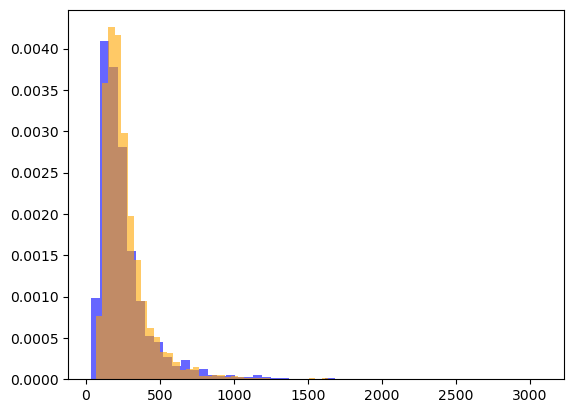

In [50]:
plt.hist(y_test, bins=50, alpha=0.6, color="blue", label="Actual prices", density=True)
plt.hist(y_test_pred, bins=50, alpha=0.6, color="orange", label="Predicted prices", density=True)
plt.show

In [51]:
#Let's calculate R^2
sum(y_test)
y_test.mean

<bound method Series.mean of 30589    228.181329
33955    122.273397
22992    370.724205
14622     85.773370
40198    202.884323
            ...    
6008     119.513510
17416    496.013133
17609    275.093809
1367     534.764371
11508    409.460596
Name: Price, Length: 4170, dtype: float64>

In [52]:
R2 = 1 - np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)
print("R^2=", R2)

R^2= 0.7243476693290638


In [53]:
# Evaluate on training set (optional, to check overfitting)
y_train_pred = best_rf.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)

Train MAE: 28.249394701966146
Train RMSE: 56.98368910075438


In [54]:
R2 = 1 - np.sum((y_train - y_train_pred) ** 2) / np.sum((y_train - y_train.mean()) ** 2)
R2

0.9212971163159918

<bound method Series.max of 0        194.033698
1        344.245776
2        264.101422
3        433.529398
4        485.552926
            ...    
41709    715.938574
41710    304.793960
41711    637.168969
41712    301.054157
41713    133.230489
Name: Price, Length: 41700, dtype: float64>

<bound method Series.max of 3384     127.481077
10088    277.654944
28777    589.290707
32044    285.694246
19544    355.769231
            ...    
6268     138.026387
11293    136.720576
38169    508.498352
860      274.178052
15805    163.321897
Name: Price, Length: 31275, dtype: float64>

3081.834280920869